In [10]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import
import numpy as np
import matplotlib.pyplot as plt
from optimize_hyperparams import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a dataset

In [11]:
from build_poly import build_poly
from standard import standardize 

# number of samples in the dataset
num_data = 1000

# features
x = np.linspace(0.1, 2 * np.pi, num_data)
x = x[:, None]

# observations
offset = 1
noiseLevel = 1
y = np.sin(x[:,0]) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x, mean_x, std_x = standardize(x)

print('x: ', x.shape)
print('y: ', y.shape)

x:  (1000, 1)
y:  (1000,)


# Tune degree of the polynomial basis function for ridge regression

In [12]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['lambda_'] = 0
arg_rr['k_fold'] = 10

# optimization parameters
degree_min = 1 
degree_max = 10
degree_steps = 1

# optimize degree
w_opt, loss_tr, loss_te, degree_opt = optimize_degree(y, x, degree_min, degree_max, degree_steps, arg_rr, debug_mode=1)

# plot results
plt.figure()
plt.plot(build_poly(x, degree_opt).dot(w_opt))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

tested degree:  [ 1  2  3  4  5  6  7  8  9 10] 

------------------------------------------ cross validation with degree =  1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


ValueError: too many values to unpack (expected 3)

# Tune lambda_ (regularization) for ridge regression

tested lambda_:  [  1.00000000e-10   1.66810054e-09   2.78255940e-08   4.64158883e-07
   7.74263683e-06   1.29154967e-04   2.15443469e-03   3.59381366e-02
   5.99484250e-01   1.00000000e+01] 

------------------------------------------ cross validation with lambda_ =  1e-10
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
------------------------------------------ cross validation with lambda_ =  1.6681005372e-09
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
------------------------------------------ cross validation with lambda_ =  2.78255940221e-08
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
------------------------------------------ cross validation with lambda_ =  4.64158883361e-07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
------------------------------------------ cross validation with lambda_ =  7.74263682681e-06
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
------------------------------------------ cross validation with lambda_ =  0.000129154966501
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
----------------

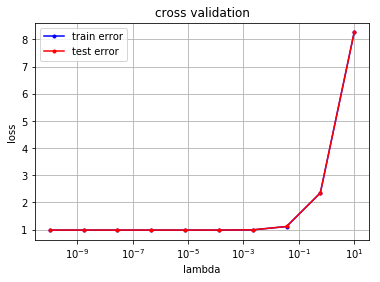

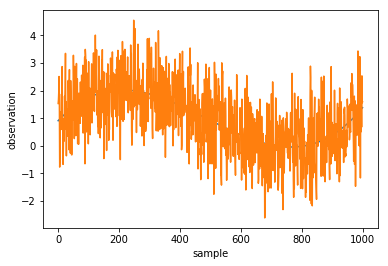

In [14]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['k_fold'] = 10

# build polynomial basis with the optimal degree
phi_opt = build_poly(x, 3)

# optimization parameters
lambda_min = -10 
lambda_max = 1
lambda_steps = 10

# optimize lambda_
w_opt, loss_tr, loss_te, lambda_opt, success_rate = optimize_lambda(y, phi_opt, lambda_min, lambda_max, lambda_steps, arg_rr, debug_mode=1)

# plot results
plt.figure()
plt.plot(phi_opt.dot(w_opt))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()